# TIDAL FIELD EVOLUTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import pynbody
import os

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
simulation = '/home/pdcg/SimsOutput/Au6_lvl4_6c8f_cfefit_noconstrain'
snapshots = ['_030', '_035', '_055', '_080', '_090', '_105', '_127']

In [50]:
def get_tidal_field_histogram(simulation, snapshot):
    s = pynbody.load(simulation + '/output/snapdir'+snapshot + '/snapshot' + snapshot)
    h = s.halos()
    transform = pynbody.analysis.angmom.faceon(h[0])
    main = h[0]
    s.physical_units()
    h.physical_units()
    R200 = h[0].properties['Group_R_Crit200']
    print('R200 = ', R200)

    gyr = 1e9 * 365.25 * 24 * 3600
    s['TidalTensor'] *= gyr**2

    # Mask out infinite values in the TidalTensor
    finite_mask = np.isfinite(s['TidalTensor']).all(axis=1)
    s['Tij'] = np.zeros((len(s),3))
    s['Tij'][finite_mask] = np.sort(np.linalg.eigvals((s['TidalTensor'][finite_mask]).reshape(len(s[finite_mask]),3,3)), axis=1)
    s['T'] = s['Tij'][:,2] + 1./3. * np.abs(s['Tij'][:,0] + s['Tij'][:,1] + s['Tij'][:,2])
    s['Omega'] = np.sqrt(1./3. * np.abs(s['Tij'][:,0] + s['Tij'][:,1] + s['Tij'][:,2]))

    fig, ax = plt.subplots(1, 2 ,figsize=(15,7), sharey=True)
    h = ax[0].hist2d(main.s['r'], np.log10(main.s['T']), bins=(np.linspace(0,R200.in_units('kpc')/2., 20), np.linspace(np.log10((main['T']).min()), np.log10((main['T']).max()), 20)), cmap='Greys', norm=colors.LogNorm(vmin=1e-1, vmax=1e2))
    h = ax[1].hist2d(main.g['r'], np.log10(main.g['T']), bins=(np.linspace(0,R200.in_units('kpc')/2., 20), np.linspace(np.log10((main['T']).min()), np.log10((main['T']).max()), 20)), cmap='Greys', norm=colors.LogNorm(vmin=1e-1, vmax=1e2))

    ax[0].hlines(np.log10(0.32), 0, R200.in_units('kpc')/2., color='r', linestyle='--')
    ax[1].hlines(np.log10(0.32), 0, R200.in_units('kpc')/2., color='r', linestyle='--')
    
    ax[0].set_ylabel(r'$\log_{10}\rm{T}_{\rm{tid}}$ [Gyr$^{-2}$]', fontsize=14)
    ax[0].set_title('Stars', fontsize=14)
    ax[1].set_title('Gas', fontsize=14)

    fig.supxlabel('Radius [kpc]', fontsize=14)
    fig.suptitle(simulation + ', z = {:.2f}'.format(s.properties['z']), fontsize=16)
    
    fig.subplots_adjust(wspace=0.)
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.78])
    fig.colorbar(h[3], cax=cbar_ax)

    plt.tick_params(labelsize=12)
    plt.show()


/home/pdcg/.local/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


R200 =  2.52e+00 kpc


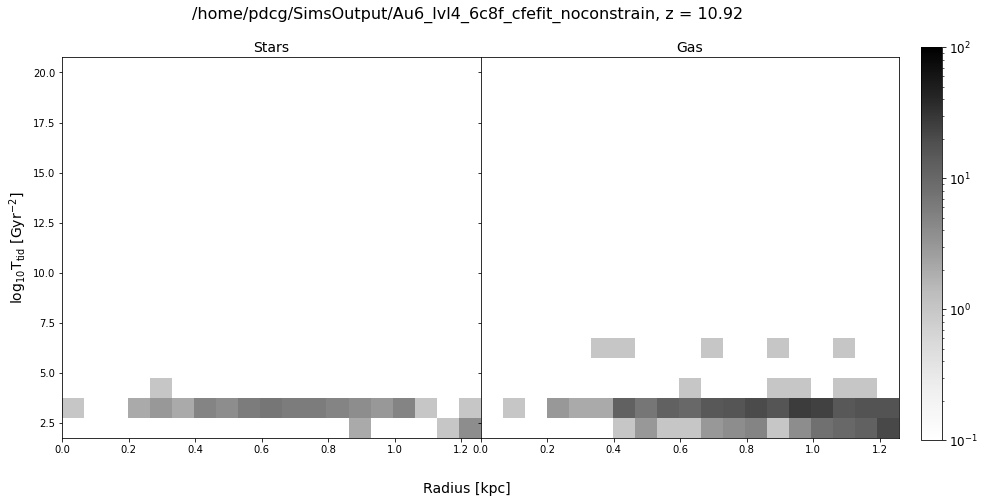

R200 =  6.05e+00 kpc


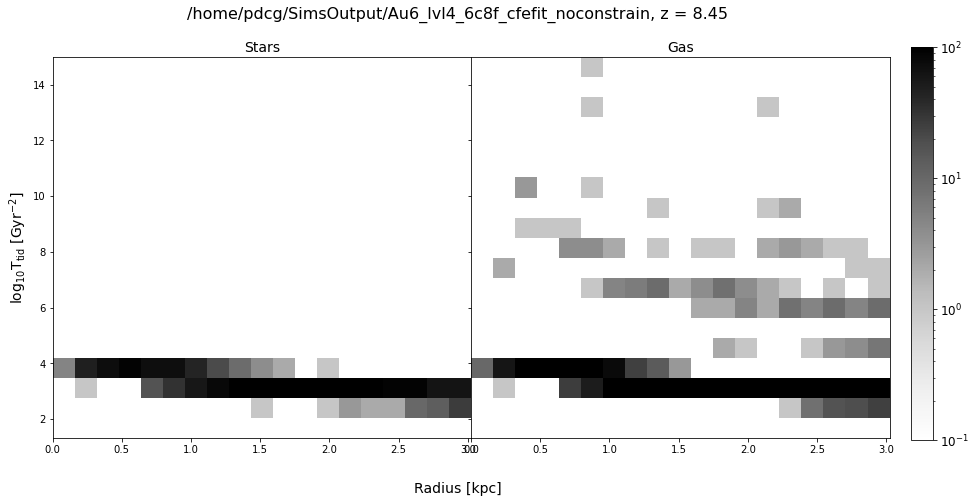

R200 =  4.82e+01 kpc


/home/pdcg/.local/lib/python3.10/site-packages/pynbody/array/__init__.py:310: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)
/home/pdcg/.local/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/pdcg/.local/lib/python3.10/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

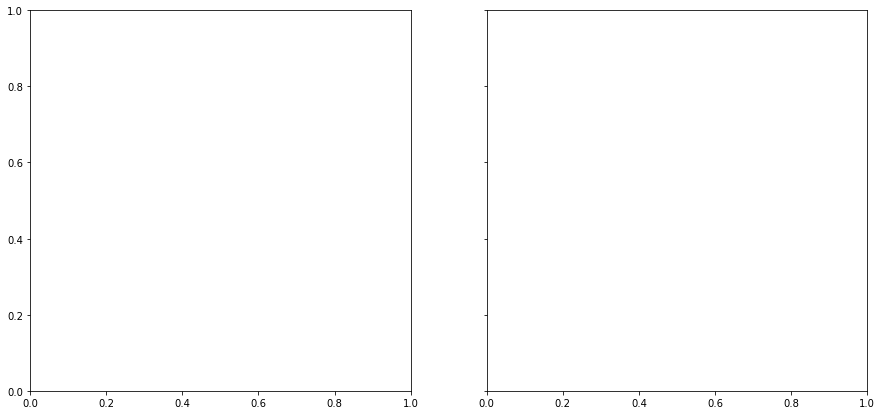

In [51]:
for i in snapshots:
    get_tidal_field_histogram(simulation, i)

In [3]:
s = pynbody.load(simulation + '/output/snapdir'+snapshots[-1] + '/snapshot' + snapshots[-1])
h = s.halos()
transform = pynbody.analysis.angmom.faceon(h[0])
main = h[0]
s.physical_units()
h.physical_units()
R200 = h[0].properties['Group_R_Crit200']
print('R200 = ', R200)

myr = 1e6 * 365.25 * 24 * 3600
s['TidalTensor'] *= myr**2

# Mask out infinite values in the TidalTensor
finite_mask = np.isfinite(s['TidalTensor']).all(axis=1)
s['Tij'] = np.zeros((len(s),3))
s['Tij'][finite_mask] = np.sort(np.linalg.eigvals((s['TidalTensor'][finite_mask]).reshape(len(s[finite_mask]),3,3)), axis=1)
s['T'] = s['Tij'][:,2] + 1./3. * np.abs(s['Tij'][:,0] + s['Tij'][:,1] + s['Tij'][:,2])
s['Omega'] = np.sqrt(1./3. * np.abs(s['Tij'][:,0] + s['Tij'][:,1] + s['Tij'][:,2]))

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


R200 =  1.90e+02 kpc


In [4]:
xmin = -0.5
xmax = 1.
ymin = -0.5
ymax = 0.5
zmin = -0.5
zmax = 0.5
mask = (main['x'] < xmax) * (main['x'] > xmin) * (main['y'] < ymax) * (main['y'] > ymin) * (main['z'] < zmax) * (main['z'] > zmin)

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/analysis/halo.py:102: RuntimeWarning: Final sphere is empty; cannot return a velocity. This probably implies something is wrong with the position centre too.
  warnings.warn("Final sphere is empty; cannot return a velocity. This probably implies something is "
/users/aripcont/.local/lib/python3.10/site-packages/pynbody/kdtree/__init__.py:352: RuntimeWarning: 

The particles span a region larger than the specified boxsize; disabling periodicity.

For more information about this warning, see the module documentation for KDTree, 
https://pynbody.readthedocs.io/latest/reference/_autosummary/pynbody.kdtree.KDTree.html
  smx = kdmain.nn_start(self.kdtree, int(nn), self.boxsize)


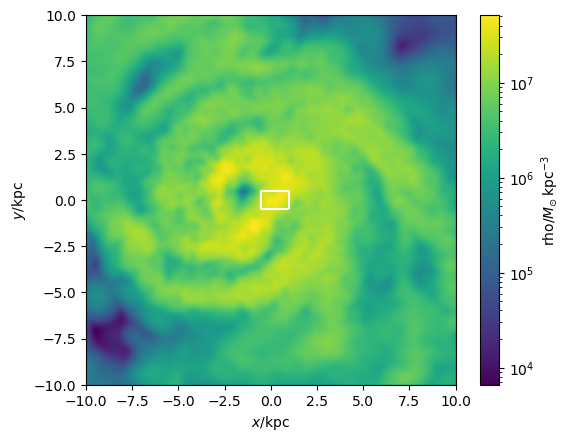

In [5]:
pynbody.plot.sph.faceon_image(main.g, width=20., weight=False)
plt.hlines(ymax, xmin, xmax, color='w')
plt.hlines(ymin, xmin, xmax, color='w')
plt.vlines(xmin, ymin, ymax, color='w')
plt.vlines(xmax, ymin, ymax, color='w')

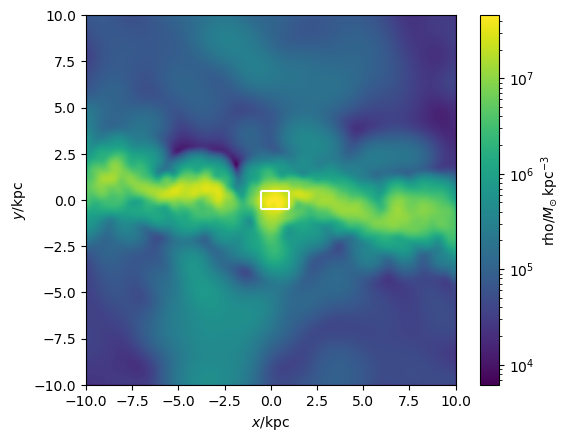

In [6]:
pynbody.plot.sph.sideon_image(main.g, width=20, weight=False)
plt.hlines(zmax, xmin, xmax, color='w')
plt.hlines(zmin, xmin, xmax, color='w')
plt.vlines(xmin, zmin, zmax, color='w')
plt.vlines(xmax, zmin, zmax, color='w')

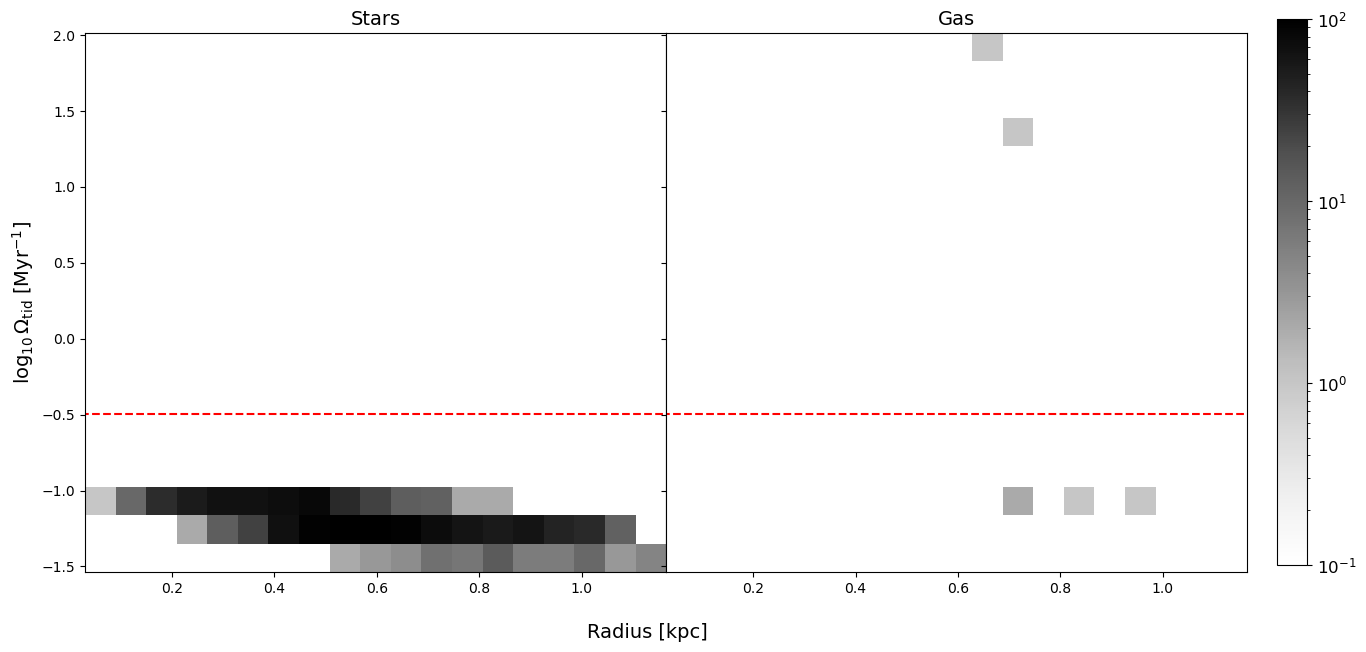

In [7]:
fig, ax = plt.subplots(1, 2 ,figsize=(15,7), sharey=True)
h = ax[0].hist2d(main[mask].s['r'], np.log10(main[mask].s['Omega']), bins=(np.linspace(main[mask]['r'].min(), main[mask]['r'].max(), 20), np.linspace(np.log10((main[mask]['Omega']).min()), np.log10((main[mask]['Omega']).max()), 20)), cmap='Greys', norm=colors.LogNorm(vmin=1e-1, vmax=1e2))
h = ax[1].hist2d(main[mask].g['r'], np.log10(main[mask].g['Omega']), bins=(np.linspace(main[mask]['r'].min(), main[mask]['r'].max(), 20), np.linspace(np.log10((main[mask]['Omega']).min()), np.log10((main[mask]['Omega']).max()), 20)), cmap='Greys', norm=colors.LogNorm(vmin=1e-1, vmax=1e2))

ax[0].hlines(np.log10(0.32), 0, R200.in_units('kpc')/2., color='r', linestyle='--')
ax[1].hlines(np.log10(0.32), 0, R200.in_units('kpc')/2., color='r', linestyle='--')

ax[0].set_ylabel(r'$\log_{10}\Omega_{\rm{tid}}$ [Myr$^{-1}$]', fontsize=14)
ax[0].set_title('Stars', fontsize=14)
ax[1].set_title('Gas', fontsize=14)

fig.supxlabel('Radius [kpc]', fontsize=14)
fig.subplots_adjust(wspace=0.)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.78])
fig.colorbar(h[3], cax=cbar_ax)

plt.tick_params(labelsize=12)

In [11]:
mask_gas = (np.log10(main.g['Omega'])>1.) * (main.g['r']<1.)

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/analysis/halo.py:102: RuntimeWarning: Final sphere is empty; cannot return a velocity. This probably implies something is wrong with the position centre too.
  warnings.warn("Final sphere is empty; cannot return a velocity. This probably implies something is "


0.020489477 -1.2760523993212844
0.2041199 -1.1859331664442587
0.29753357 -1.1507781152700352
0.16199552 -1.198646025028737
0.17230274 -1.339325637856256
0.053400315 -1.2497193946939211
0.3754515 -1.4321073612187956


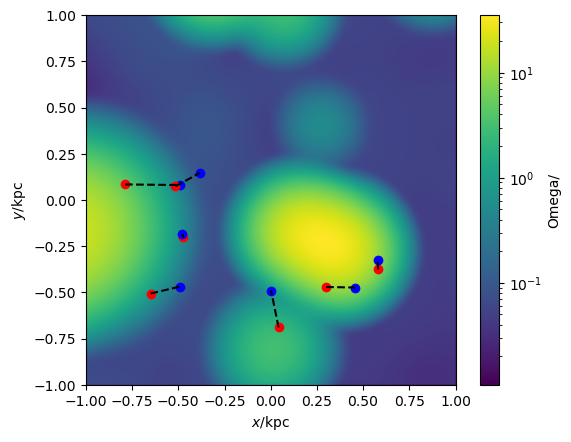

In [19]:
pynbody.plot.sph.faceon_image(main.g, qty='Omega', width=2., weight=False)
for i in range(len(main.g[mask_gas])):
    plt.scatter(main.g['x'][mask_gas][i], main.g['y'][mask_gas][i], color='r')
    rel_pos = main[mask].s['pos'] - main.g[mask_gas]['pos'][i]
    rel_r = np.sum(rel_pos**2, axis=1)**0.5
    min_r = np.argmin(rel_r)
    plt.scatter(main[mask].s['x'][min_r], main[mask].s['y'][min_r], color='b')
    plt.plot([main.g[mask_gas]['x'][i], main[mask].s['x'][min_r]], [main.g[mask_gas]['y'][i], main[mask].s['y'][min_r]], color='k', linestyle='--')
    print(rel_r[min_r], np.log10(main[mask].s['Omega'][min_r]))

/users/aripcont/.local/lib/python3.10/site-packages/pynbody/analysis/halo.py:102: RuntimeWarning: Final sphere is empty; cannot return a velocity. This probably implies something is wrong with the position centre too.
  warnings.warn("Final sphere is empty; cannot return a velocity. This probably implies something is "


0.020489477 -1.2760523993212844
0.2041199 -1.1859331664442587
0.29753357 -1.1507781152700352
0.16199552 -1.198646025028737
0.17230274 -1.339325637856256
0.053400315 -1.2497193946939211
0.3754515 -1.4321073612187956


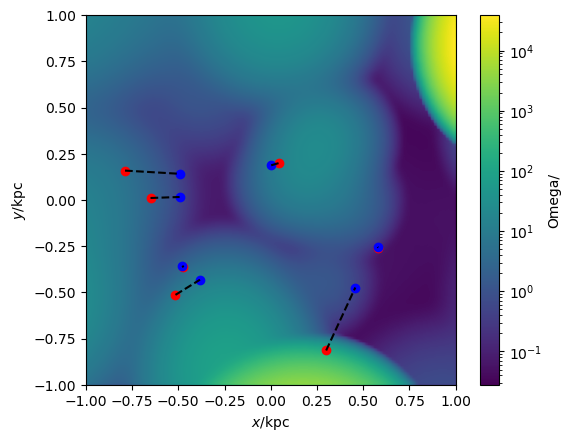

In [18]:
pynbody.plot.sph.sideon_image(main.g, qty='Omega', width=2., weight=False)
for i in range(len(main.g[mask_gas])):
    rel_pos = main[mask].s['pos'] - main.g[mask_gas]['pos'][i]
    rel_r = np.sum(rel_pos**2, axis=1)**0.5
    min_r = np.argmin(rel_r)
    plt.plot([main.g[mask_gas]['x'][i], main[mask].s['x'][min_r]], [main.g[mask_gas]['z'][i], main[mask].s['z'][min_r]], color='k', linestyle='--')
    plt.scatter(main.g['x'][mask_gas][i], main.g['z'][mask_gas][i], color='r')
    plt.scatter(main[mask].s['x'][min_r], main[mask].s['z'][min_r], color='b')
    print(rel_r[min_r], np.log10(main[mask].s['Omega'][min_r]))